In [3]:
import json
import pandas as pd
import numpy as np 

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Define Path

In [5]:
train_challenge = '/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/arc-agi_training_challenges.json'
train_solution = "/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/arc-agi_training_solutions.json"

eval_challenge = '/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/arc-agi_evaluation_challenges.json'
eval_solution = '/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/arc-agi_evaluation_solutions.json'

### Functions

In [6]:
def DataMaker(challenge_data, solution_data):
    # Loading the data that contains the "challenge"
    challenge = pd.read_json(challenge_data)
    
    # Loading the data that contains the "solution"
    with open(solution_data) as json_data:
        solution = json.load(json_data) 
        
    # Updating the challenge dataset with the solution outputs
    for key in challenge.columns:
        challenge[key]['test'][0]['output'] = solution[key][0]
        
    return challenge

In [7]:
def InputOutputDataset(df):
    all_ids = df.columns
    records = []

    for key in all_ids:
        for idx, entry in enumerate(df[key]['train']):
            records.append({
                'id': f'{key}_train_{idx}',
                'input': entry['input'],
                'output': entry['output'],
                'input_shape': np.array(entry['input']).shape,
                'output_shape': np.array(entry['output']).shape
            })
        
        test_entry = df[key]['test'][0]
        records.append({
            'id': f'{key}_test',
            'input': test_entry['input'],
            'output': test_entry['output'],
            'input_shape': np.array(test_entry['input']).shape,
            'output_shape': np.array(test_entry['output']).shape
        })
    
    # Convert the list of records into a DataFrame
    new_df = pd.DataFrame(records, columns=['id', 'input', 'output', 'input_shape', 'output_shape'])
    
    return new_df

### Creating Train and Eval dataset

In [8]:
new_train_data = DataMaker(train_challenge,train_solution)
new_train_data = InputOutputDataset(new_train_data)
new_train_data

,id,input,output,input_shape,output_shape
0,007bbfb7_train_0,"[[0, 7, 7], [7, 7, 7], [0, 7, 7]]","[[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, ...","(3, 3)","(9, 9)"
1,007bbfb7_train_1,"[[4, 0, 4], [0, 0, 0], [0, 4, 0]]","[[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, ...","(3, 3)","(9, 9)"
2,007bbfb7_train_2,"[[0, 0, 0], [0, 0, 2], [2, 0, 2]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, ...","(3, 3)","(9, 9)"
3,007bbfb7_train_3,"[[6, 6, 0], [6, 0, 0], [0, 6, 6]]","[[6, 6, 0, 6, 6, 0, 0, 0, 0], [6, 0, 0, 6, 0, ...","(3, 3)","(9, 9)"
4,007bbfb7_train_4,"[[2, 2, 2], [0, 0, 0], [0, 2, 2]]","[[2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, ...","(3, 3)","(9, 9)"
...,...,...,...,...,...
1697,ff28f65a_test,"[[0, 0, 0, 2, 2, 0], [2, 2, 0, 2, 2, 0], [2, 2...","[[1, 0, 1], [0, 1, 0], [0, 0, 0]]","(6, 6)","(3, 3)"
1698,ff805c23_train_0,"[[0, 3, 3, 3, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,...","[[0, 3, 3, 3, 3], [0, 3, 3, 3, 3], [3, 0, 0, 3...","(24, 24)","(5, 5)"
1699,ff805c23_train_1,"[[0, 3, 3, 3, 0, 3, 0, 8, 8, 0, 8, 8, 8, 8, 0,...","[[6, 6, 6, 6, 6], [6, 6, 6, 6, 6], [6, 6, 0, 6...","(24, 24)","(5, 5)"
1700,ff805c23_train_2,"[[0, 3, 3, 3, 3, 0, 5, 5, 5, 0, 0, 5, 5, 0, 0,...","[[0, 5, 5, 0, 5], [0, 5, 5, 0, 0], [5, 5, 5, 5...","(24, 24)","(5, 5)"


In [9]:
new_eval_data = DataMaker(eval_challenge, eval_solution)
new_eval_data = InputOutputDataset(new_eval_data)
new_eval_data

,id,input,output,input_shape,output_shape
0,00576224_train_0,"[[8, 6], [6, 4]]","[[8, 6, 8, 6, 8, 6], [6, 4, 6, 4, 6, 4], [6, 8...","(2, 2)","(6, 6)"
1,00576224_train_1,"[[7, 9], [4, 3]]","[[7, 9, 7, 9, 7, 9], [4, 3, 4, 3, 4, 3], [9, 7...","(2, 2)","(6, 6)"
2,00576224_test,"[[3, 2], [7, 8]]","[[3, 2, 3, 2, 3, 2], [7, 8, 7, 8, 7, 8], [2, 3...","(2, 2)","(6, 6)"
3,009d5c81_train_0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","(14, 14)","(14, 14)"
4,009d5c81_train_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","(14, 14)","(14, 14)"
...,...,...,...,...,...
1758,ff72ca3e_train_0,"[[0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 2, 2, ...","(12, 10)","(12, 10)"
1759,ff72ca3e_train_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, ...","(9, 10)","(9, 10)"
1760,ff72ca3e_train_2,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, ...","(9, 8)","(9, 8)"
1761,ff72ca3e_train_3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","(9, 11)","(9, 11)"


### Save CSVs

In [20]:
new_train_data.to_csv('/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/new_train_data.csv', index=False)  
new_eval_data.to_csv('/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/new_eval_data.csv', index=False)  


### Simple EDA

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


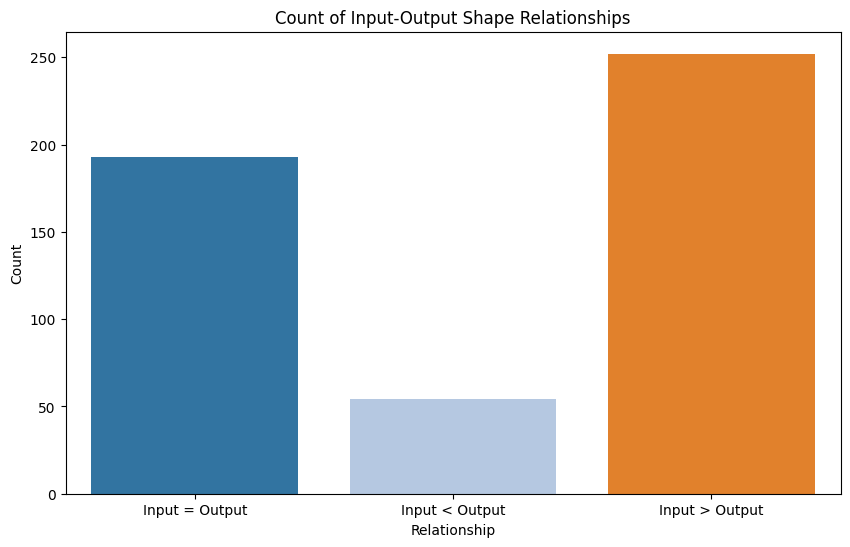

In [42]:
# Group by input_shape and output_shape, count occurrences
freq_counts = new_train_data.groupby(['input_shape', 'output_shape']).size().reset_index(name='count')

# Categorize into three groups based on input_shape and output_shape comparison
freq_counts['comparison'] = np.where(freq_counts['input_shape'] > freq_counts['output_shape'], 'Input > Output',
                                        np.where(freq_counts['input_shape'] < freq_counts['output_shape'], 'Input < Output', 'Input = Output'))

# Sort by count in descending order
freq_counts_sorted = freq_counts.sort_values(by='count', ascending=False)

# Plotting the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='comparison', data=freq_counts_sorted, palette='tab20')
plt.title('Count of Input-Output Shape Relationships')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()